# Medical Image Classification for Malaria Detection
## 1. Tensorflow with custom CNN

## Dataset

In [1]:
# Setting Directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Dataset
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/cell_images.zip"

In [10]:
# Count the number of images
from glob import glob

filepaths_parasitized = list(glob('/content/cell_images/Parasitized/*.png'))
filepaths_uninfected = list(glob('/content/cell_images/Uninfected/*.png'))
print("Number of parasitized images:", len(filepaths_parasitized))
print("Number of uninfected images:", len(filepaths_uninfected))

Number of parasitized images: 13779
Number of uninfected images: 13779


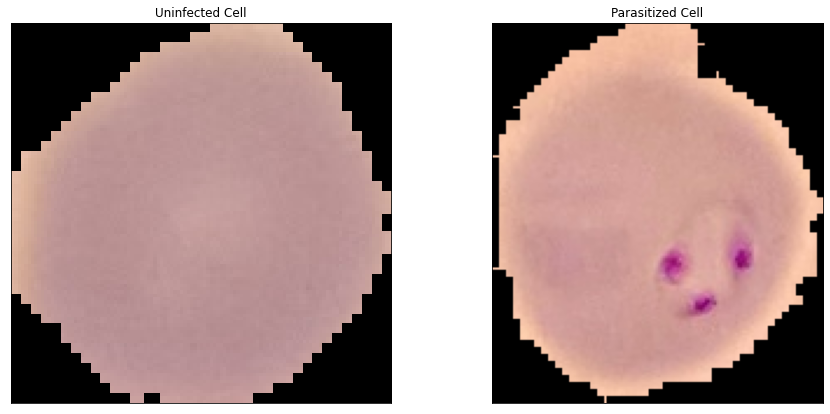

In [7]:
# See Images
upic='/content/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(plt.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(plt.imread(apic))
plt.title('Parasitized Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [6]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, 
                             rotation_range = 30,
                             shear_range=0.2,
                             zoom_range=0.4,
                             vertical_flip =True,
                             horizontal_flip =True,
                             validation_split=0.2)

In [8]:
trainDatagen = datagen.flow_from_directory(directory='/content/cell_images/', 
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [9]:
valDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


## CNN Model

In [11]:
# Custom CNN model
model = keras.Sequential([
    keras.layers.Conv2D(16,(5,5), input_shape=(width,height,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32,(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    keras.layers.Conv2D(64,(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(8,8)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [14]:
# Train model
model.fit(trainDatagen, epochs = 5, batch_size=64)

Epoch 1/5
1378/1378 [==============================] - 110s 73ms/step - loss: 0.3731 - accuracy: 0.8326
Epoch 2/5
1378/1378 [==============================] - 98s 71ms/step - loss: 0.2812 - accuracy: 0.8957
Epoch 3/5
1378/1378 [==============================] - 97s 70ms/step - loss: 0.2618 - accuracy: 0.9040
Epoch 4/5
1378/1378 [==============================] - 96s 70ms/step - loss: 0.2464 - accuracy: 0.9082
Epoch 5/5
1378/1378 [==============================] - 96s 70ms/step - loss: 0.2384 - accuracy: 0.9119


## Report accuracy from training/validation data

In [15]:
train_loss, train_acc = model.evaluate(trainDatagen, verbose=2)
print('\nAccuracy:', train_acc)

1378/1378 - 91s - loss: 0.2269 - accuracy: 0.9143 - 91s/epoch - 66ms/step

Accuracy: 0.9142779111862183


In [16]:
val_loss, val_acc = model.evaluate(valDatagen, verbose=2)
print('\nAccuracy:', val_acc)

345/345 - 23s - loss: 0.2276 - accuracy: 0.9120 - 23s/epoch - 67ms/step

Accuracy: 0.9119782447814941
